# BCG PowerCo Churn Evaluation Using Data Science  

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Dec 29 12:22:05 2020

@author: Albert
This file was created to show exploratory data analysis for BCG's virtuaal experience. Thank You. 
"""
import pandas as pd
import os
import datetime
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
from scipy import stats
sns.set(color_codes=True)
#os.getcwd()

# EDA and Data cleaning 
#   1. Loading data through pandas
#       A. Loading three dataframes
#   2. Data cleaning
#      A. Drop Duplicates - remove duplicate id's 
#      B. Remove Unwanted Columns
#      C. Remove large n/a value columns
#      D. Combine all Dataframes
#   3. General statistics of a dataframe
#       A. Data types
#       B. Data statistics
#   4. Format/ Convert data
#       A. Dates
#   5. Data visualization
#       A. Churn percentage
#       B. Detecting outliers using boxplots
#       C. Using a correlation matrix
#       D. Looking at p-values
#       E. Final Thoughts EDA
#   6. Saving the Cleaned Data as an Excel File


# Feature Engineering and Predictive Modeling
#   7. Data Evaluation
#       A. Plotting distributions to look for skewdness
#   8. Detecting outliers
#       A. Standard Deviation
#   9. Logistic Regression and Model Testing
#       A. Creating Test and Training sets
#       B. Evaluating the Model
#       C. Confusion Matrix
#       D. Churn Prediction Model Results
#   10. Discount Hypothesis Test
#       A. Identify Variable weights
#       B. Provide 20% discount
#       C. Run Model with 20% discount
#       D. Hypothesis Results


## EDA and Data Cleaning
### 1. Loading data through pandas  
    A. Loading three dataframes

In [2]:
df_train = pd.read_csv ('/Users/yasminrassouli/Documents/BCG Data Science/ml_case_training_data.csv')
df_hist = pd.read_csv ('/Users/yasminrassouli/Documents/BCG Data Science/ml_case_training_hist_data.csv')
df_churn = pd.read_csv ('/Users/yasminrassouli/Documents/BCG Data Science/ml_case_training_output.csv')

df_train.isnull().sum()
df_hist.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

### 2. Data Cleaning
    A. Drop Duplicates - Remove Duplicate id's 
    B. Remove Unwanted Columns
    C. Remove Large n/a Value Columns
    D. Combine all Dataframes

In [3]:
" A. DROP DUPLICATES - remove duplicate id's """
df_train = df_train.drop_duplicates(subset=['id'])
df_hist = df_hist.drop_duplicates(subset=['id'])

""" point out columns with large numbers of missing values in the dataframe df_missing """
df_missing = df_train.columns[df_train.isnull().any()]

""" B. remove 'activity_new', 'channel_sales', 'campaign_disc_ele','date_first_activ', 'forecast_base_bill_ele', 
                        'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_discount_energy', 
                        'forecast_price_energy_p1', 'forecast_price_energy_p2','forecast_price_pow_p1' columns from df """

df_train = df_train.drop(columns = ['activity_new', 'channel_sales', 'campaign_disc_ele','date_first_activ', 'forecast_base_bill_ele', 
                        'forecast_base_bill_year', 'forecast_bill_12m', 'forecast_cons', 'forecast_discount_energy', 
                        'forecast_price_energy_p1', 'forecast_price_energy_p2','forecast_price_pow_p1'])

""" C. Remove columns with missing values are listed in the dataframe df_missing """
df_train = df_train.dropna(subset=['date_end', 'pow_max', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin'])
df_hist = df_hist.dropna(subset=['price_p1_var', 'price_p2_var', 'price_p3_var', 'price_p1_fix', 'price_p2_fix', 'price_p3_fix'])

""" D. Combining the three dataframes train hist and churn into one df """
"""merge output dataframe with case_training by id to include churn values in case_training df"""
df = pd.merge(df_train, df_hist, on='id')
df = pd.merge(df, df_churn, on='id')
df.shape

(16043, 28)

In [4]:
""" ---------------------------- EXPLORATORY DATA ANALYSIS ---------------------------- """

"""CHECK IF CURRENT MISSING VALUES MAKE SENSE"""
df_missing = df.columns[df.isnull().any()]
df[df_missing].isna().sum() 

date_modif_prod    155
date_renewal        38
origin_up           87
dtype: int64

### 3. General Statistics
    A. Data Types in the Dataframe
    B. Basic Statistics of the Dataframe

In [5]:
df.dtypes

id                          object
cons_12m                     int64
cons_gas_12m                 int64
cons_last_month              int64
date_activ                  object
date_end                    object
date_modif_prod             object
date_renewal                object
forecast_cons_12m          float64
forecast_cons_year           int64
forecast_meter_rent_12m    float64
has_gas                     object
imp_cons                   float64
margin_gross_pow_ele       float64
margin_net_pow_ele         float64
nb_prod_act                  int64
net_margin                 float64
num_years_antig              int64
origin_up                   object
pow_max                    float64
price_date                  object
price_p1_var               float64
price_p2_var               float64
price_p3_var               float64
price_p1_fix               float64
price_p2_fix               float64
price_p3_fix               float64
churn                        int64
dtype: object

In [6]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
count,1.604300e+04,1.604300e+04,1.604300e+04,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000,16043.000000
mean,1.935373e+05,3.192405e+04,1.942908e+04,2368.470142,1904.733092,70.263162,195.862538,22.449511,21.445054,1.348127,217.795809,5.030169,20.555696,0.142563,0.054829,0.030372,43.223211,10.706412,6.464706,0.099109
std,6.768488e+05,1.777403e+05,8.232611e+04,4035.286447,5257.387714,78.894367,494.529201,23.604749,27.845022,1.461996,366.513443,1.675438,21.486067,0.022859,0.050371,0.035854,5.323104,12.835470,7.773061,0.298817
min,-1.252760e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,-242.960000,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.901000e+03,0.000000e+00,0.000000e+00,512.780000,0.000000,16.230000,0.000000,12.035000,11.950000,1.000000,51.915000,4.000000,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000
50%,1.531200e+04,0.000000e+00,8.980000e+02,1178.960000,377.000000,19.440000,44.230000,21.090000,21.000000,1.000000,119.670000,5.000000,13.856000,0.148825,0.084991,0.000000,44.266931,0.000000,0.000000,0.000000
75%,5.006350e+04,0.000000e+00,4.125000e+03,2688.030000,1993.000000,131.480000,217.610000,29.640000,29.640000,1.000000,275.740000,6.000000,19.800000,0.152445,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,2411.690000,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,0.280700,0.229298,0.114102,59.444710,36.490692,16.791555,1.000000


### 4. Data Format
    A. Data Type Conversion

In [7]:
""" A. DATA TYPE CONVERSION """
# Date columns are in object format and can be converted to integer format but since this 
# analysis is based on price and churn, we will not be doing any conversion on dates. Instead,
# we will convert 'true', 'false' values into binary '1', '0' values respectively for all
# applicable cases.

df["has_gas"]= df["has_gas"].replace(["t", "f"],[1,0])

### 5. Data Visualization
    A. Churn Data Visualization
    B. Detecting Outliers Using Box Plots
    C. Using a Correlation Matrix
    D. Looking at p-values
    E. Final Thoughts EDA

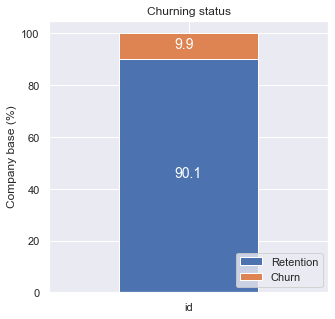

In [8]:
""" A. CHURN DATA VISUALIZATION"""

# Calculate churn percentage (it's about 10%)
churn = df[["id","churn"]]
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
     Plot stacked bars with annotations
     """
    ax = dataframe.plot(kind="bar",
                         stacked=True,
                         figsize=size_,
                         rot=rot_,
                         title=title_)
     # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
     # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
     # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(value,
                    ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=colour,
                    size=textsize,
                    )

plot_stacked_bars(churn_percentage.transpose(),"Churning status", (5,5), legend_="lower right")


<AxesSubplot:xlabel='churn'>

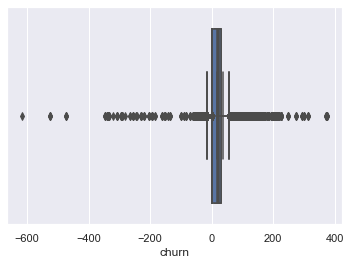

In [9]:
""" B. DETECTING OUTLIERS USING BOX PLOTS"""
#sns.boxplot(x=df['cons_gas_12m'])
#sns.boxplot(x=df['forecast_cons_year'])
#sns.boxplot(x=df['nb_prod_act'])
#sns.boxplot(x=df['num_years_antig'])
sns.boxplot(x=df['margin_gross_pow_ele'])                       
sns.boxplot(x=df['margin_gross_pow_ele'])
sns.boxplot(x=df['margin_net_pow_ele'])
sns.boxplot(x=df['price_p2_var'])
sns.boxplot(x=df['price_p3_var'])
sns.boxplot(x=df['price_p2_fix'])
sns.boxplot(x=df['price_p3_fix'])
sns.boxplot(x=df['churn'])

<AxesSubplot:xlabel='cons_12m'>

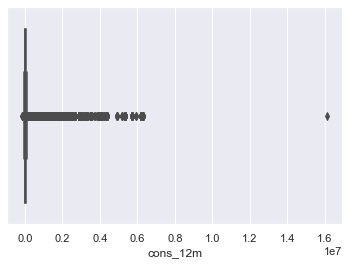

In [10]:
# has significant outlier in boxplot
sns.boxplot(x=df['cons_12m'])                             

<AxesSubplot:xlabel='net_margin'>

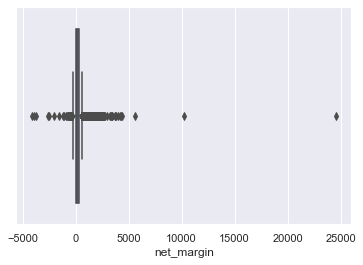

In [11]:
# has significant outlier in boxplot
sns.boxplot(x=df['net_margin']) 

<AxesSubplot:xlabel='cons_last_month'>

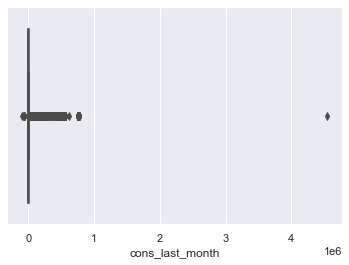

In [12]:
# has significant outlier in boxplot
sns.boxplot(x=df['cons_last_month'])                          

<AxesSubplot:xlabel='price_p1_var'>

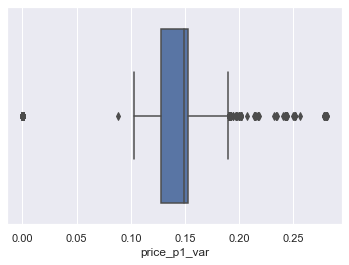

In [13]:
# has significant outlier in boxplot
sns.boxplot(x=df['price_p1_var'])                          

<AxesSubplot:xlabel='price_p1_fix'>

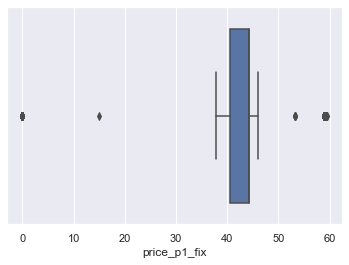

In [14]:
# has significant outlier in boxplot
sns.boxplot(x=df['price_p1_fix'])                            

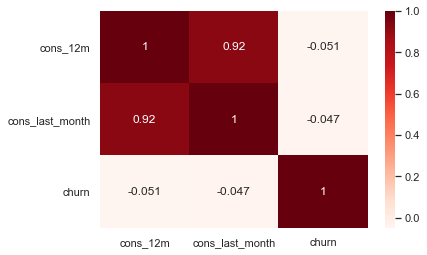

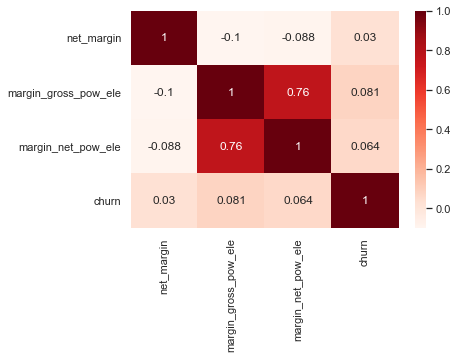

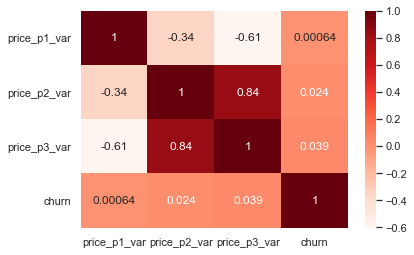

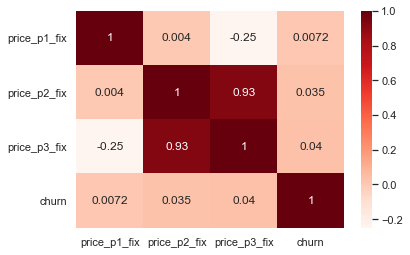

In [15]:
""" C. USING A CORRELATION MATRIX"""
# Creating a correlation heatmap using cons_12m, consumption_last_month, and churn as rows and columns
df[['cons_12m','cons_last_month','churn']].corr()
sns.heatmap(df[['cons_12m','cons_last_month','churn']].corr(), annot=True, cmap = 'Reds')
plt.show()

# Creating a correlation heatmap using net_margin, margin_gross_pow_ele, margin_net_pow_ele, and churn as rows and columns
df[['net_margin','margin_gross_pow_ele', 'margin_net_pow_ele', 'churn']].corr()
sns.heatmap(df[['net_margin','margin_gross_pow_ele','margin_net_pow_ele', 'churn']].corr(), annot=True, cmap = 'Reds')
plt.show()

# Creating a correlation heatmap using price_p1_var, price_p2_var, price_p3_var, and churn as rows and columns
df[['price_p1_var','price_p2_var', 'price_p3_var', 'churn']].corr()
sns.heatmap(df[['price_p1_var','price_p2_var','price_p3_var', 'churn']].corr(), annot=True, cmap = 'Reds')
plt.show()

# Creating a correlation heatmap using price_p1_fix, price_p1_fix, price_p1_fix, and churn as rows and columns
df[['price_p1_fix','price_p2_fix', 'price_p3_fix', 'churn']].corr()
sns.heatmap(df[['price_p1_fix','price_p2_fix','price_p3_fix', 'churn']].corr(), annot=True, cmap = 'Reds')
plt.show()

In [16]:
""" D. LOOKING AT P-VALUES"""

# we get low correlation for margin and consumption variables with respect to churn. Try using a point-biserial correlation to double check 
# and get a look at p values.

print(stats.pointbiserialr(df['cons_12m'], df['churn']))
print(stats.pointbiserialr(df['cons_last_month'], df['churn']))
print(stats.pointbiserialr(df['net_margin'], df['churn']))
print(stats.pointbiserialr(df['margin_gross_pow_ele'], df['churn']))
print(stats.pointbiserialr(df['margin_net_pow_ele'], df['churn']))
print(stats.pointbiserialr(df['imp_cons'], df['churn']))

PointbiserialrResult(correlation=-0.05123598886978723, pvalue=8.394339519812901e-11)
PointbiserialrResult(correlation=-0.04673771233469825, pvalue=3.168545287045819e-09)
PointbiserialrResult(correlation=0.02993748607669099, pvalue=0.00014915904475766123)
PointbiserialrResult(correlation=0.08116421434888142, pvalue=7.305129917041309e-25)
PointbiserialrResult(correlation=0.06390586489898303, pvalue=5.404969443222569e-16)
PointbiserialrResult(correlation=0.003907931997919412, pvalue=0.6206384091368145)


In [17]:
print(stats.pointbiserialr(df['price_p1_var'], df['churn']))
print(stats.pointbiserialr(df['price_p2_var'], df['churn']))
print(stats.pointbiserialr(df['price_p3_var'], df['churn']))
print(stats.pointbiserialr(df['price_p1_fix'], df['churn']))
print(stats.pointbiserialr(df['price_p2_fix'], df['churn']))
print(stats.pointbiserialr(df['price_p3_fix'], df['churn']))

PointbiserialrResult(correlation=0.0006399991377887661, pvalue=0.9353969400220042)
PointbiserialrResult(correlation=0.024356882154937202, pvalue=0.002033582261960833)
PointbiserialrResult(correlation=0.03912184198132497, pvalue=7.16925915356387e-07)
PointbiserialrResult(correlation=0.007230515072909119, pvalue=0.3597903613000602)
PointbiserialrResult(correlation=0.035226599727900196, pvalue=8.086818882037972e-06)
PointbiserialrResult(correlation=0.04025844773288037, pvalue=3.3814167375680013e-07)


### E. Final Thoughts EDA 
Based on p-values from point-biserial correlations above, the variables cons_12m, cons_last_month, net_margin, margin_gross_pow_ele, margin_net_pow_ele,price_p2_var, price_p3_var, price_p2_fix, and price_p3_fix are statistically significant! 

Also, our correlation matrix is showing that there is a higher correlation between price and churn in periods 2 and 3 than any other variable. I would like to further explore the effects of pricing in periods one and two on customer churn.

### 6. Saving the Cleaned Data as an Excel File

In [18]:
""" ---------------------------- Save final dataframe df to file directory for submission ---------------------------- """
#df.to_excel('cleaned_data.xlsx')

' ---------------------------- Save final dataframe df to file directory for submission ---------------------------- '

### Data Evaluation
    A. Plotting Distributions to Look for Skewdness

/Users/yasminrassouli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yasminrassouli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yasminrassouli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

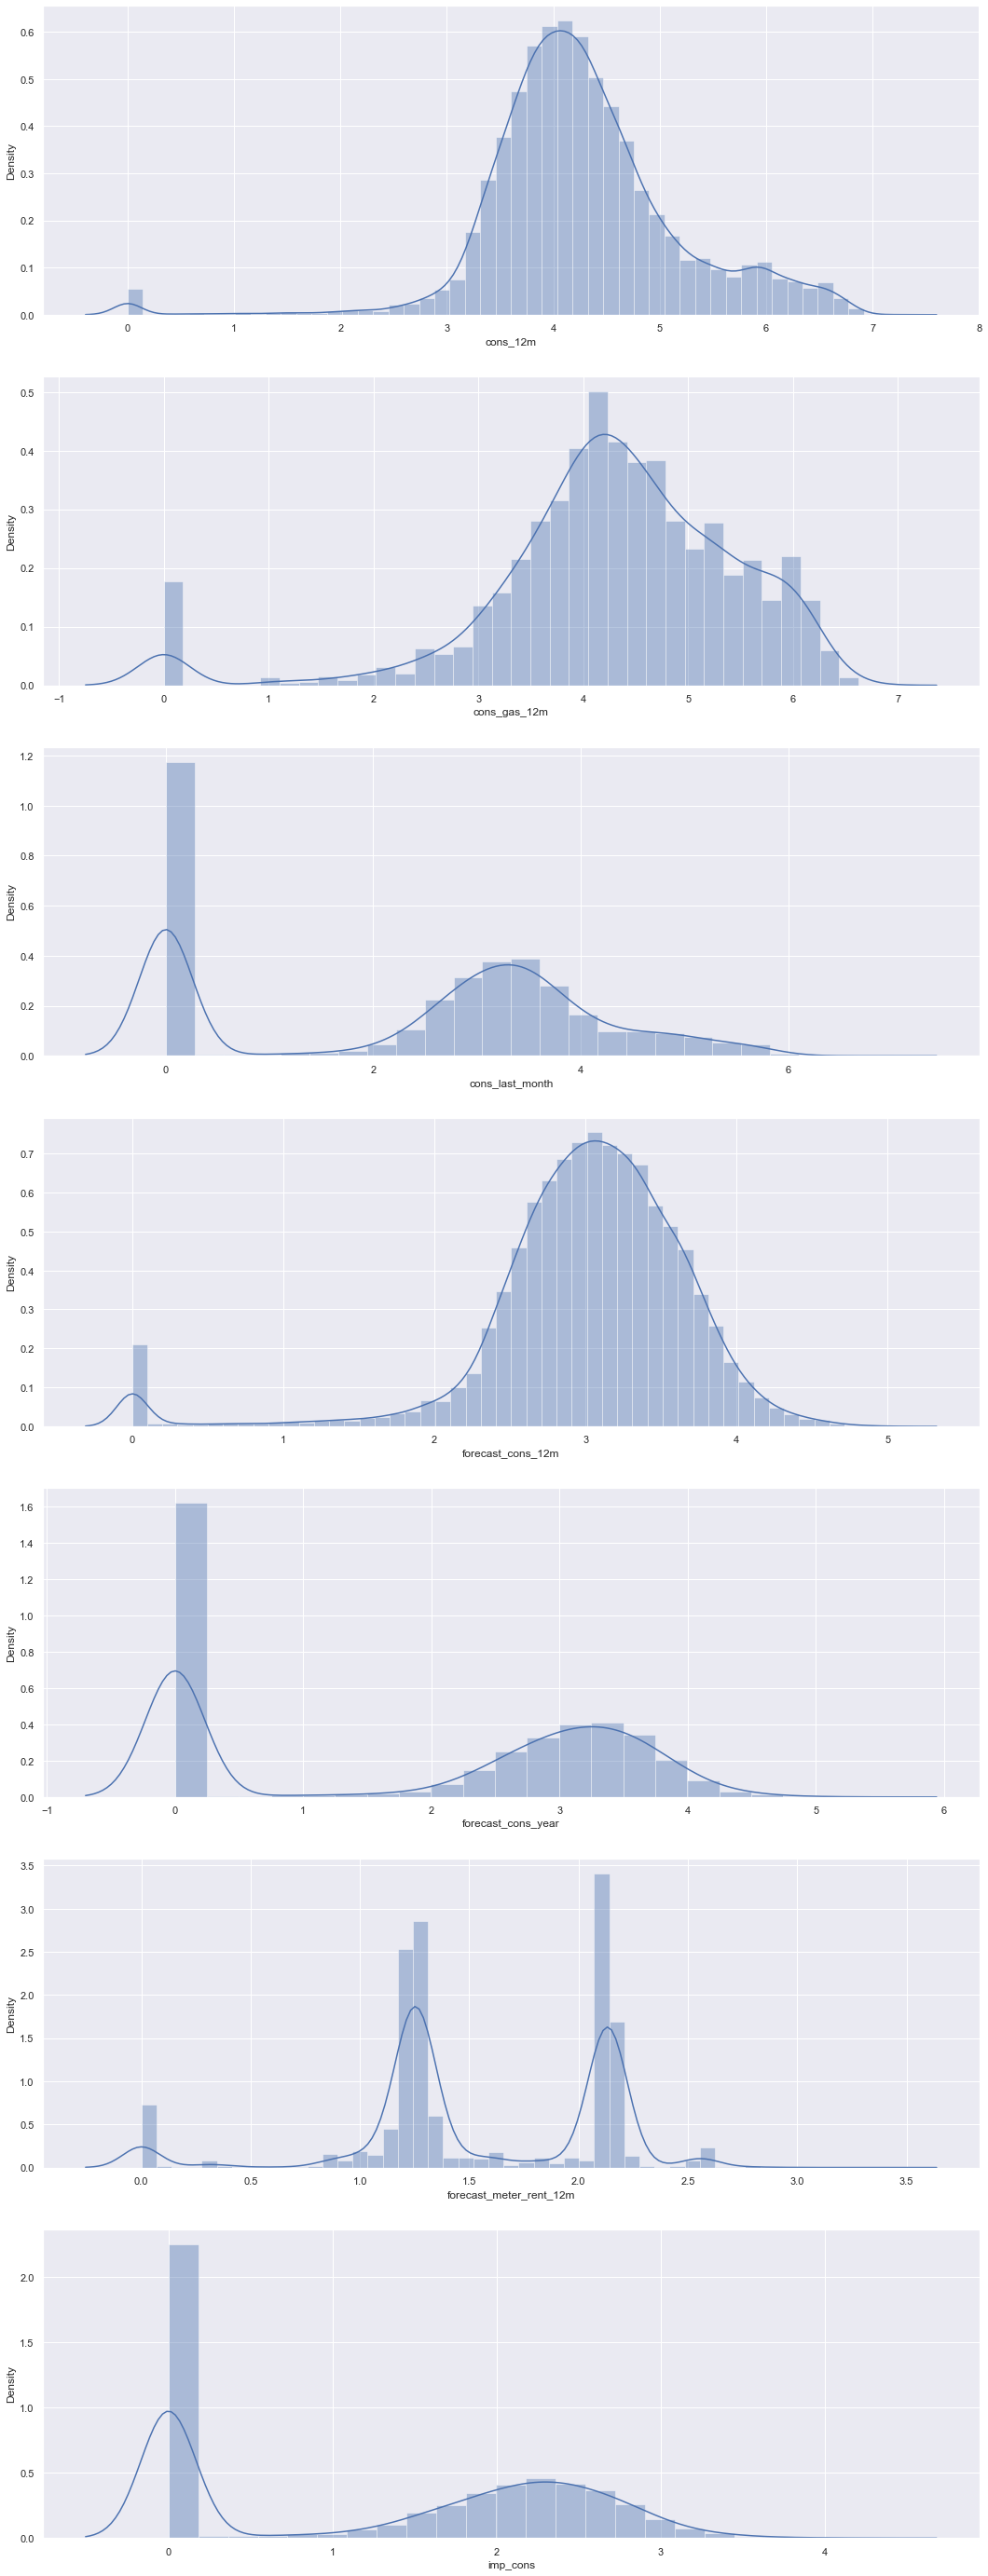

In [19]:
# Remove negative values
df.loc[df.cons_12m < 0,"cons_12m"] = np.nan
df.loc[df.cons_gas_12m < 0,"cons_gas_12m"] = np.nan
df.loc[df.cons_last_month < 0,"cons_last_month"] = np.nan
df.loc[df.forecast_cons_12m < 0,"forecast_cons_12m"] = np.nan
df.loc[df.forecast_cons_year < 0,"forecast_cons_year"] = np.nan
df.loc[df.forecast_meter_rent_12m < 0,"forecast_meter_rent_12m"] = np.nan
df.loc[df.imp_cons < 0,"imp_cons"] = np.nan
# Apply log10 transformation
df["cons_12m"] = np.log10(df["cons_12m"]+1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"]+1)
df["cons_last_month"] = np.log10(df["cons_last_month"]+1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"]+1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"]+1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"]+1)
df["imp_cons"] = np.log10(df["imp_cons"]+1)

#Plot distributions
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histograms
sns.distplot((df["cons_12m"].dropna()), ax=axs[0])
sns.distplot((df[df["has_gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.distplot((df["cons_last_month"].dropna()), ax=axs[2])
sns.distplot((df["forecast_cons_12m"].dropna()), ax=axs[3])
sns.distplot((df["forecast_cons_year"].dropna()), ax=axs[4])
sns.distplot((df["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.distplot((df["imp_cons"].dropna()), ax=axs[6])
plt.show()



### 8. Detecting Outliers
    A. Using Standard Deviation

In [20]:
""" A. Using Standard Deviation """
#Dropping the outlier rows using standard deviation (note that price_p1_var and price_p1_fix were ommited)
factor = 3
upper_lim = df['cons_12m'].mean () + df['cons_12m'].std () * factor
lower_lim = df['cons_12m'].mean () - df['cons_12m'].std () * factor

df = df[(df['cons_12m'] < upper_lim) & (df['cons_12m'] > lower_lim)]

#Dropping the outlier rows using standard deviation
factor = 3
upper_lim = df['net_margin'].mean () + df['net_margin'].std () * factor
lower_lim = df['net_margin'].mean () - df['net_margin'].std () * factor

df = df[(df['net_margin'] < upper_lim) & (df['net_margin'] > lower_lim)]

#Dropping the outlier rows using standard deviation
factor = 3
upper_lim = df['cons_last_month'].mean () + df['cons_last_month'].std () * factor
lower_lim = df['cons_last_month'].mean () - df['cons_last_month'].std () * factor

df = df[(df['cons_last_month'] < upper_lim) & (df['cons_last_month'] > lower_lim)]
df.reset_index()


# Using this method we can see a reduction in total rows from 16042 to 15462 (96% of data remains) 

,index,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
0,2,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2009-08-21,2016-08-30,2009-08-21,2015-08-31,2.280920,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0
1,3,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,2010-04-16,2016-04-16,2010-04-16,2015-04-17,1.689841,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2015-01-01,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0
2,4,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2010-03-30,2016-03-30,2010-03-30,2015-03-31,2.382089,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2015-01-01,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0
3,5,568bb38a1afd7c0fc49c77b3789b59a3,5.083990,0.000000,4.093457,2010-04-08,2016-04-08,2010-04-08,2015-04-12,4.036071,...,lxidpiddsbxsbosboudacockeimpuepw,75.000,2015-01-01,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,0
4,6,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2010-01-13,2016-03-07,2010-01-13,2015-03-09,2.650065,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15621,16038,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,2012-05-24,2016-05-08,2015-05-08,2014-05-26,3.667360,...,lxidpiddsbxsbosboudacockeimpuepw,15.000,2015-01-01,0.148825,0.000000,0.000000,44.266931,0.000000,0.000000,0
15622,16039,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2012-08-27,2016-08-27,2012-08-27,2015-08-28,2.801191,...,lxidpiddsbxsbosboudacockeimpuepw,6.000,2015-01-01,0.109747,0.096908,0.070730,58.936774,36.344726,8.334260,1
15623,16040,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2012-02-08,2016-02-07,2012-02-08,2015-02-09,2.281919,...,lxidpiddsbxsbosboudacockeimpuepw,15.935,2015-01-01,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,1
15624,16041,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,2012-08-30,2016-08-30,2012-08-30,2015-08-31,1.308351,...,lxidpiddsbxsbosboudacockeimpuepw,11.000,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0


### 9. Logistic Regression and Model Testing
    A. Creating Test and Training sets
    B. Evaluating the Model
    C. Confusion Matrix
    D. Churn Prediction Model Results

In [21]:
""" A. Creating Test and Training sets """
# Remove n/a values from columns 

df = df[df['cons_last_month'].notna()]
df = df[df['cons_gas_12m'].notna()]
df = df[df['imp_cons'].notna()]
df = df[df['forecast_meter_rent_12m'].notna()]
df = df[df['forecast_cons_12m'].notna()]
df = df[df['forecast_cons_year'].notna()]
df = df[df['forecast_meter_rent_12m'].notna()]
df["churn"] = df["churn"].astype(int)

# store later needed columns and drop columns deemed unnecessary for Logistic Regression Calculations
id_number = df['id']
df.drop(columns=['id', "date_activ", "date_end", "date_modif_prod", "date_renewal", 'origin_up', 'price_date'],inplace=True)


In [22]:
Y = df["churn"].values
X = df.drop(labels = ["churn"],axis = 1)

""" Churn Prediction Model Results"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

from sklearn import metrics
prediction_test = model.predict(X_test)

/Users/yasminrassouli/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluating the Model

In [23]:
# Print the prediction accuracy
print ('Churn predictive model accuracy is ') 
print(metrics.accuracy_score(y_test, prediction_test))

Churn predictive model accuracy is 
0.9087606837606838


In [24]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [25]:
""" B. Confusion Matrix """
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_hat_test)
cnf_matrix

array([[4253,    2],
       [ 425,    0]])

False positive = 2, False Negative = 425, True Positive = 4253, True Negative = 0

In [26]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
precision_train = precision_score(y_train, y_hat_train)
precision_test = precision_score(y_test, y_hat_test)
recall_train = recall_score(y_train, y_hat_train)
recall_test = recall_score(y_test, y_hat_test)
accuracy_train = accuracy_score(y_train, y_hat_train)
accuracy_test = accuracy_score(y_test, y_hat_test)
f1_train = f1_score(y_train, y_hat_train)
f1_test = f1_score(y_test, y_hat_test)
print(precision_train)
print(precision_test)
print(recall_train)
print(recall_test)
print(accuracy_train)
print(accuracy_test)
print(f1_train)
print(f1_test)

0.16666666666666666
0.0
0.0009017132551848512
0.0
0.8980769230769231
0.9087606837606838
0.0017937219730941704
0.0


Although our model accuracy is great, all other measures show lower than expected scores.

In [27]:
"""Number of correct predictions in train data """

# Find residual differences between train data and predicted train data
residuals = np.abs(y_train, y_hat_train)
# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residuals).value_counts())
# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residuals).value_counts(normalize = True))

0    9811
1    1109
dtype: int64
0    0.898443
1    0.101557
dtype: float64


In [28]:
""" Number of correct predictions in test data """
# Find residual differences between test data and predicted test data
residual = np.abs(y_test, y_hat_test)
# Print the number of times our model was correct ('0') and incorrect ('1')
print(pd.Series(residual).value_counts())
# Print normalized amount of times our model was correct (percentage)
print(pd.Series(residual).value_counts(normalize = True))

0    4255
1     425
dtype: int64
0    0.909188
1    0.090812
dtype: float64


For our case, we will be using the accuracy metric as confirmation. The fact that our prediction accuracy is about the same with both test and train data is a good sign that our model is working well! 

Both are showing a churn prediction accuracy of around 90%

In [29]:
""" D. Churn Prediction Model Results """
# Now, we can show each individuals probability to churn based on our model
df['probability_to_churn'] = model.predict_proba(df[X_train.columns])[:,1]

# merge back id_number column to match id's with probability of churn
result = pd.concat([ df, id_number], axis=1)

#result.to_excel('churn_probability_by_id.xlsx')
result.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn,id
2,3.668479,0.0,0.000000,2.280920,0.000000,1.237292,0,0.000000,16.38,16.38,...,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.073460,d29c2c54acc38ff3c0614d0a653813dd
3,2.736397,0.0,0.000000,1.689841,0.000000,1.599009,0,0.000000,28.60,28.60,...,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.088477,764c75f661154dac3a6c254cd082ea7d
4,3.200029,0.0,0.000000,2.382089,0.000000,1.318689,0,0.000000,30.22,30.22,...,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.086844,bba03439a292a1e166f80264c16191cb
5,5.083990,0.0,4.093457,4.036071,4.093457,2.234871,0,3.022581,-3.18,-3.18,...,75.000,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389,0,0.083235,568bb38a1afd7c0fc49c77b3789b59a3
6,3.646011,0.0,2.721811,2.650065,2.721811,2.122969,0,1.726890,44.91,44.91,...,19.800,0.126098,0.103975,0.070232,40.565969,24.339581,16.226389,0,0.113943,149d57cf92fc41cf94415803a877cb4b


In [30]:
# Seperate high likely to churn customers from low likely to churn customers

result_high_prob = result[result['probability_to_churn'] >= 0.20]
# average probability to churn in this set is 26%

result_low_prob = result[result['probability_to_churn'] <= 0.20]
# average probability to churn in this set is 10%

result_high_prob.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,4.205495,0.378446,1.999390,3.079578,1.814379,1.835472,0.098039,1.287745,88.970476,77.629300,...,3.439776,34.723300,0.143354,0.090055,0.061370,41.646555,19.613577,12.964929,0.274510,0.259690
std,0.776931,1.268708,1.730873,0.887563,1.686941,0.624224,0.297785,1.249038,65.400970,78.082737,...,0.730467,27.152855,0.040777,0.043969,0.032213,6.639666,9.933126,6.568389,0.446893,0.082022
min,1.662758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.790000,-203.880000,...,1.000000,10.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200020
25%,3.746556,0.000000,0.000000,2.568894,0.000000,1.494294,0.000000,0.000000,37.620000,32.910000,...,3.000000,16.400000,0.126098,0.101083,0.068646,40.565969,24.339581,16.226389,0.000000,0.211273
50%,4.378997,0.000000,2.606381,3.361057,2.152288,2.114811,0.000000,1.340444,69.840000,66.210000,...,3.000000,25.097000,0.129444,0.104552,0.071536,40.565969,24.339581,16.226389,0.000000,0.229033
75%,4.797787,0.000000,3.622732,3.720048,3.490801,2.161398,0.000000,2.550632,127.990000,119.880000,...,4.000000,43.648000,0.153159,0.108020,0.074934,41.063970,24.437330,16.291555,1.000000,0.272318
max,6.223976,6.258624,5.308462,4.266765,4.479532,2.778376,1.000000,3.641447,374.640000,374.640000,...,6.000000,200.000000,0.280700,0.168867,0.114102,59.444710,36.344726,16.791555,1.000000,0.822455


In [31]:
result_low_prob.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,...,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000,15243.000000
mean,4.313593,0.809457,2.374713,3.018466,1.873969,1.537631,0.185725,1.302445,21.011028,20.240166,...,5.052418,19.196428,0.142818,0.053349,0.029188,43.186802,10.267123,6.244398,0.094207,0.098807
std,0.809473,1.756332,1.777190,0.632307,1.596176,0.578300,0.388897,1.149756,17.862361,23.150338,...,1.656365,17.149280,0.022041,0.050275,0.035544,5.144802,12.696429,7.740450,0.292126,0.035033
min,1.568202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-525.540000,-615.660000,...,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188
25%,3.782222,0.000000,0.000000,2.723423,0.000000,1.235781,0.000000,0.000000,12.300000,12.300000,...,4.000000,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.073768
50%,4.181615,0.000000,2.966611,3.069080,2.599883,1.307068,0.000000,1.673666,20.640000,20.610000,...,5.000000,13.856000,0.148968,0.084213,0.000000,44.266931,0.000000,0.000000,0.000000,0.094760
75%,4.678669,0.000000,3.606435,3.412374,3.289143,2.121855,0.000000,2.330830,28.600000,28.600000,...,6.000000,19.800000,0.152445,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000,0.120697
max,6.798393,6.622052,5.887169,4.684449,4.805976,3.382502,1.000000,3.986050,224.640000,224.640000,...,15.000000,451.000000,0.280700,0.229298,0.101027,59.444710,36.490689,16.791555,1.000000,0.199996


### 10. Discount Hypothesis Test
    A. Identify Variable weights
    B. Provide 20% discount
    C. Run Model with 20% discount
    D. Hypothesis Results

In [32]:
""" A. Identify Variable Weights """
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
weights.sort_values(ascending = False)

price_p2_fix               0.028301
imp_cons                   0.010938
margin_gross_pow_ele       0.006420
forecast_meter_rent_12m    0.002930
margin_net_pow_ele         0.002499
net_margin                 0.000849
price_p3_var              -0.000155
price_p1_var              -0.000362
price_p2_var              -0.000945
forecast_cons_year        -0.004091
pow_max                   -0.006146
forecast_cons_12m         -0.007178
has_gas                   -0.008890
price_p1_fix              -0.021815
price_p3_fix              -0.022878
nb_prod_act               -0.037003
cons_gas_12m              -0.041463
cons_last_month           -0.061352
cons_12m                  -0.106110
num_years_antig           -0.198144
dtype: float64

The top five positive variable weights are imp_cons, forecast_meter_rent_12m, price_p2_fix, forecast_cons_year, and margin_gross_pow_ele. These variables promote customer churn and should be looked at further.

We will now focus on reducing variable 'price_p2_fix' by 20% according to our client PowerCo's reommendation.

In [33]:
""" B. Provide 20% Discount """
# apply the 20% discount onto df's 'price_p2_fix' column and redo feature scaling to run the model and
# look for any noticible change in customer churn amount.

df_new = df.drop(labels = ["probability_to_churn"], axis = 1)
df_new['price_p2_fix'] = df_new['price_p2_fix'].astype(float)/1.25
#df_new['price_p3_fix'] = df_new['price_p3_fix'].astype(float)/1.25
#comment or uncomment the above line if you would like to test the scenarios listed
#in section 10D

df_new.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,net_margin,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn
2,3.668479,0.0,0.000000,2.280920,0.000000,1.237292,0,0.000000,16.38,16.38,...,18.89,6,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0
3,2.736397,0.0,0.000000,1.689841,0.000000,1.599009,0,0.000000,28.60,28.60,...,6.60,6,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0
4,3.200029,0.0,0.000000,2.382089,0.000000,1.318689,0,0.000000,30.22,30.22,...,25.46,6,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0
5,5.083990,0.0,4.093457,4.036071,4.093457,2.234871,0,3.022581,-3.18,-3.18,...,823.18,6,75.000,0.123086,0.100505,0.068646,40.565969,19.471665,16.226389,0
6,3.646011,0.0,2.721811,2.650065,2.721811,2.122969,0,1.726890,44.91,44.91,...,47.98,6,19.800,0.126098,0.103975,0.070232,40.565969,19.471665,16.226389,0


In [34]:
""" C. Run Model with 20% discount """
# Create 'test' data set by splitting df_new into test/training data
# Now, normalize the new set
Y_new = df_new["churn"].values
X_new = df_new.drop(labels = ["churn"],axis = 1)

from sklearn.model_selection import train_test_split
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y_new, test_size=0.3, random_state=101)


In [35]:
df_new['probability_to_churn'] = model.predict_proba(df_new[X_train.columns])[:,1]
df_new.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
2,3.668479,0.0,0.000000,2.280920,0.000000,1.237292,0,0.000000,16.38,16.38,...,6,13.800,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.073460
3,2.736397,0.0,0.000000,1.689841,0.000000,1.599009,0,0.000000,28.60,28.60,...,6,13.856,0.172468,0.087881,0.000000,44.266931,0.000000,0.000000,0,0.088477
4,3.200029,0.0,0.000000,2.382089,0.000000,1.318689,0,0.000000,30.22,30.22,...,6,13.200,0.153133,0.000000,0.000000,44.266931,0.000000,0.000000,0,0.086844
5,5.083990,0.0,4.093457,4.036071,4.093457,2.234871,0,3.022581,-3.18,-3.18,...,6,75.000,0.123086,0.100505,0.068646,40.565969,19.471665,16.226389,0,0.073308
6,3.646011,0.0,2.721811,2.650065,2.721811,2.122969,0,1.726890,44.91,44.91,...,6,19.800,0.126098,0.103975,0.070232,40.565969,19.471665,16.226389,0,0.100756


In [36]:
y_hat_train_new = model.predict(X_train_new)
y_hat_test_new = model.predict(X_test_new)

In [37]:
""" D. New 20% Reduced Cost Results """
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix_new = confusion_matrix(y_test_new, y_hat_test_new)
cnf_matrix_new

array([[4253,    2],
       [ 425,    0]])

In [38]:
df_new.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,...,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000
mean,4.311119,0.799594,2.366124,3.019865,1.872606,1.544447,0.183718,1.302109,22.566254,21.553494,...,5.015513,19.551754,0.142831,0.054189,0.029925,43.151554,8.384810,6.398195,0.098333,0.096770
std,0.808881,1.747855,1.776976,0.639315,1.598278,0.581080,0.387266,1.152082,22.641956,27.137923,...,1.658641,17.595011,0.022642,0.050438,0.035795,5.188678,10.173388,7.780617,0.297774,0.040085
min,1.568202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-525.540000,-615.660000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000168
25%,3.781881,0.000000,0.000000,2.721407,0.000000,1.236033,0.000000,0.000000,12.360000,12.360000,...,4.000000,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.072153
50%,4.184975,0.000000,2.963079,3.072353,2.595496,1.309204,0.000000,1.670710,21.090000,21.090000,...,5.000000,13.856000,0.148825,0.084769,0.000000,44.266931,0.000000,0.000000,0.000000,0.091570
75%,4.681935,0.000000,3.606945,3.420493,3.292034,2.121954,0.000000,2.334137,29.640000,29.640000,...,6.000000,19.800000,0.152445,0.103395,0.071536,44.266931,19.471665,16.226389,0.000000,0.116871
max,6.798393,6.622052,5.887169,4.684449,4.805976,3.382502,1.000000,3.986050,374.640000,374.640000,...,15.000000,451.000000,0.280700,0.229298,0.114102,59.444710,29.192551,16.791555,1.000000,0.801437


In [39]:
df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_meter_rent_12m,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,...,num_years_antig,pow_max,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,churn,probability_to_churn
count,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,...,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000,15600.000000
mean,4.311119,0.799594,2.366124,3.019865,1.872606,1.544447,0.183718,1.302109,22.566254,21.553494,...,5.015513,19.551754,0.142831,0.054189,0.029925,43.151554,10.481013,6.398195,0.098333,0.102489
std,0.808881,1.747855,1.776976,0.639315,1.598278,0.581080,0.387266,1.152082,22.641956,27.137923,...,1.658641,17.595011,0.022642,0.050438,0.035795,5.188678,12.716735,7.780617,0.297774,0.043950
min,1.568202,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-525.540000,-615.660000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000188
25%,3.781881,0.000000,0.000000,2.721407,0.000000,1.236033,0.000000,0.000000,12.360000,12.360000,...,4.000000,12.500000,0.127566,0.000000,0.000000,40.565969,0.000000,0.000000,0.000000,0.074121
50%,4.184975,0.000000,2.963079,3.072353,2.595496,1.309204,0.000000,1.670710,21.090000,21.090000,...,5.000000,13.856000,0.148825,0.084769,0.000000,44.266931,0.000000,0.000000,0.000000,0.095892
75%,4.681935,0.000000,3.606945,3.420493,3.292034,2.121954,0.000000,2.334137,29.640000,29.640000,...,6.000000,19.800000,0.152445,0.103395,0.071536,44.266931,24.339581,16.226389,0.000000,0.123123
max,6.798393,6.622052,5.887169,4.684449,4.805976,3.382502,1.000000,3.986050,374.640000,374.640000,...,15.000000,451.000000,0.280700,0.229298,0.114102,59.444710,36.490689,16.791555,1.000000,0.822455


In [40]:
# Average probability to churn goes down from 10.25% to 9.67% by reducing 'price_p2_fix' 
# by 20%. 

# (The following scenarios are not shown in this notebook)
# 1. Churn probability actually goes up to 10.5% when reducing 'price_p3_fix' by 20% and
# leaving 'price_p2_fix' alone.

# 2. Average probability to churn goes down from 10.25% to 9.9% by reducing 'price_p2_fix' 
# and 'price_p3_fix' by 20%.